This notebook is designed to run in a Python environment having DAGMA package.

It is recommended to create a dedicated Conda environment for this notebook using the following command: conda create --name dagma python=3.x dagma

In [3]:
# !pip install dagma

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
from utils.data.functions import (
    load_features,
    load_adjacency_matrix
)

import matplotlib.pyplot as plt
import time
from dagma import utils
from dagma.linear import DagmaLinear
# from dagma.nonlinear import DagmaMLP, DagmaNonlinear
import networkx as nx

c:\Users\m.amintoosi\.conda\envs\pth-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
time_start = time.time()
###### Settings ######
DATA_PATHS = {
    "shenzhen": {"feat": "data/sz_speed.csv", "adj": "data/sz_adj.csv"},
    "losloop": {"feat": "data/los_speed.csv", "adj": "data/los_adj.csv"},
}

time_start = time.time()
###### Settings ######
dataset_name = 'losloop'#'shenzhen' 

###### load data ######
data = load_features(DATA_PATHS[dataset_name]["feat"])
adj = load_adjacency_matrix(DATA_PATHS[dataset_name]["adj"])

time_len = data.shape[0]
num_nodes = data.shape[1]
data1 =np.mat(data,dtype=np.float32)

#### normalization
max_value = np.max(data1)
data1 = data1/max_value

W_true = adj

In [20]:
type(adj[0,0]), adj.shape, type(adj)

(numpy.float32, (207, 207), numpy.ndarray)

In [21]:
G = nx.from_numpy_array(adj, create_using=nx.DiGraph)

# Check if the graph is a DAG
is_dag = nx.is_directed_acyclic_graph(G)

print("The graph is a DAG:", is_dag)

The graph is a DAG: False


In [22]:
# # Draw the graph
# # pos = nx.spring_layout(G)  # positions for all nodes
# pos = nx.circular_layout(G)  # positions for all nodes
# nx.draw(G, pos, with_labels=True, node_size=70, node_color='skyblue', font_size=5, font_color='black', font_weight='bold', edge_color='gray')
# plt.show()


In [23]:
print(time_len, num_nodes)
print(data.shape, data1.shape)

2016 207
(2016, 207) (2016, 207)


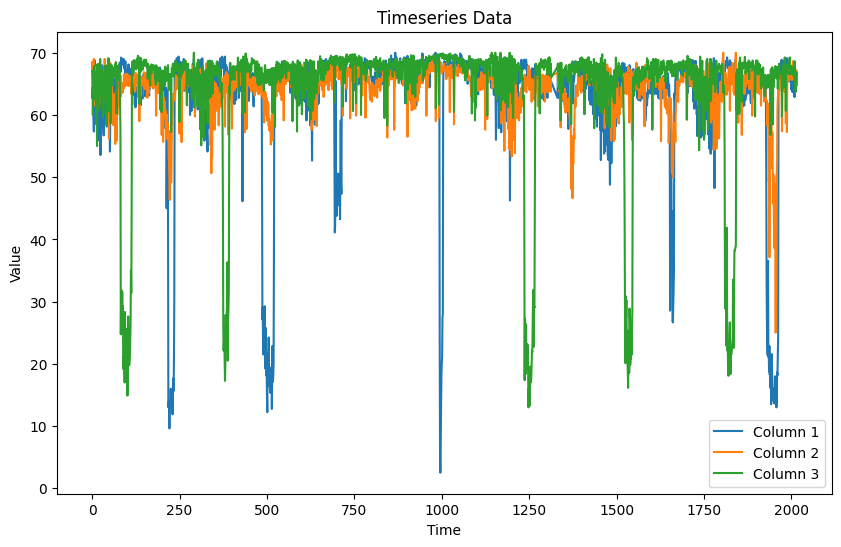

In [24]:
plt.figure(figsize=(10, 6))  # Set the figure size

for i in range(3):  
    plt.plot(data[:, i], label=f'Column {i+1}')  # Plot the column data with a label

plt.xlabel('Time')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.title('Timeseries Data')  # Set the title of the plot
plt.legend()  # Show the legend

plt.show()  # Show the plot


In [ ]:
%%time

pred_list = [1,2,3,4]
num_nodes = data.shape[1]
for pre_len in pred_list:
    W_est_all = np.zeros((num_nodes,num_nodes,pre_len))
    for i in range(pre_len):
        # X = data.values
        # Considering prediction length
        X = data[i::pre_len]
        model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
        w_est = model.fit(X, lambda1=0.02) # fit the model with L1 reg. (coeff. 0.02)
        W_est_all[:,:,i] = w_est

        acc = utils.count_accuracy(W_true, w_est > 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
        print(pre_len, w_est.shape, acc, np.count_nonzero(w_est > 0))

    W_est_file_name = f"data/W_est_{dataset_name}_pre_len{pre_len}.npy"
    np.save(W_est_file_name, W_est_all)

100%|██████████| 180000/180000.0 [02:16<00:00, 1322.39it/s] 


1 (207, 207) {'fdr': 0.15706806282722513, 'tpr': 1.0568302153194493, 'fpr': 0.001622674167027261, 'shd': 1389, 'nnz': 191} 191


100%|██████████| 180000/180000.0 [02:27<00:00, 1218.12it/s] 


2 (207, 207) {'fdr': 0.24242424242424243, 'tpr': 1.0617719731733144, 'fpr': 0.003028991778450887, 'shd': 1401, 'nnz': 231} 231


100%|██████████| 180000/180000.0 [02:35<00:00, 1154.53it/s]


2 (207, 207) {'fdr': 0.2815126050420168, 'tpr': 1.0603600423579245, 'fpr': 0.003623972306360883, 'shd': 1416, 'nnz': 238} 238


100%|██████████| 180000/180000.0 [02:36<00:00, 1150.94it/s] 


3 (207, 207) {'fdr': 0.3958333333333333, 'tpr': 1.061418990469467, 'fpr': 0.006166161834703592, 'shd': 1460, 'nnz': 288} 288


100%|██████████| 180000/180000.0 [02:28<00:00, 1213.86it/s] 


3 (207, 207) {'fdr': 0.41830065359477125, 'tpr': 1.062830921284857, 'fpr': 0.006923409779316313, 'shd': 1470, 'nnz': 306} 306


100%|██████████| 180000/180000.0 [02:33<00:00, 1170.46it/s] 


3 (207, 207) {'fdr': 0.4375, 'tpr': 1.063536886692552, 'fpr': 0.007572479446127218, 'shd': 1480, 'nnz': 320} 320


100%|██████████| 180000/180000.0 [02:24<00:00, 1247.02it/s] 


4 (207, 207) {'fdr': 0.5405405405405406, 'tpr': 1.0660077656194846, 'fpr': 0.011899610558199913, 'shd': 1553, 'nnz': 407} 407


100%|██████████| 180000/180000.0 [02:39<00:00, 1131.73it/s]


4 (207, 207) {'fdr': 0.5620767494356659, 'tpr': 1.0684786445464172, 'fpr': 0.013468195586326266, 'shd': 1575, 'nnz': 443} 443


100%|██████████| 180000/180000.0 [02:26<00:00, 1225.08it/s] 


4 (207, 207) {'fdr': 0.562200956937799, 'tpr': 1.0645958348040947, 'fpr': 0.012710947641713544, 'shd': 1572, 'nnz': 418} 418


100%|██████████| 180000/180000.0 [02:35<00:00, 1159.39it/s] 

4 (207, 207) {'fdr': 0.5806451612903226, 'tpr': 1.0642428521002472, 'fpr': 0.013630463003028993, 'shd': 1590, 'nnz': 434} 434
CPU times: total: 54min 47s
Wall time: 25min 4s


In [ ]:
adj_all = np.zeros(W_est_all.shape, dtype=int)
# Update values in adj based on the condition
adj_all[W_est_all > 0] = 1
adj = np.any(adj_all, axis=2)
W_est = adj.astype(int)
print('adj.shape=', adj.shape, type(adj[0,0]))
W_est_file_name = f"data/W_est_{dataset_name}_pre_len{pre_len}.npy"
np.save(W_est_file_name, W_est_all)

adj.shape= (156, 156) <class 'numpy.bool_'>


The saved W_est will be loaded in main.py

In [5]:
pre_len = 1
W_est_file_name = f"data/W_est_{dataset_name}_pre_len{pre_len}.npy"
W_est_all = np.load(W_est_file_name)
W_est_all.shape

(207, 207, 1)

In [9]:
adj_matrix = W_est_all[:,:,0]
dag = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Check if the graph is a DAG
is_dag = nx.is_directed_acyclic_graph(dag)

print("The graph is a DAG:", is_dag)

The graph is a DAG: True


In [10]:
W_est = adj_matrix 

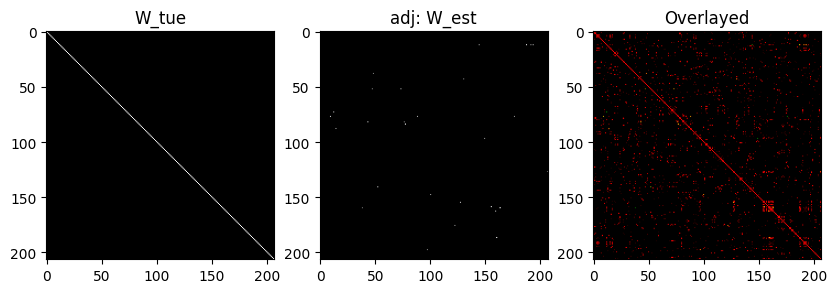

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(W_true.astype(np.uint8), cmap='gray')
axs[0].set_title('W_tue')

axs[1].imshow(W_est, cmap='gray')
axs[1].set_title('adj: W_est')

overlay_image = np.zeros((W_true.shape[0], W_true.shape[1], 3), dtype=np.uint8)
overlay_image[..., 0] = W_true * 255  # Red channel
overlay_image[..., 1] = W_est * 255   # Green channel

axs[2].imshow(overlay_image)
axs[2].set_title('Overlayed')

plt.show()